# Dummy Variable Trap
* Use K-1 encoding
* $(X^TX)^-1$ is required for solution
* $X^TX$ is not invertible because bias column is a linear combination of one hot encoded columns, vice versa. 

# Ways to deal with dummy variable trap
* Use K-1 encoding
* Remove the bias term
* Use L2 regularization. $X^TX$ is sigular(not invertible), but $\lambda I+ X^TX$ is not.
  * Inverting a singular matrix is like diving by 0 (determinant=0). Adding $\lambda I$ is the matrix equivalent of adding a small number $\lambda$ to the denomicator.
  
  
* Gradient Descent (most general method, used all throughout deep learning)


# Let's see how dummy variable trap is not a problem when we use gradient descent.

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 

In [16]:
N = 10
D = 3
X = np.zeros((N, D))
X[:, 0] = 1
X[:5, 1] = 1
X[5:, 2] = 1
X

array([[ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.]])

In [17]:
Y = np.array([0]*5 + [1]*5)

In [18]:
X, Y

(array([[ 1.,  1.,  0.],
        [ 1.,  1.,  0.],
        [ 1.,  1.,  0.],
        [ 1.,  1.,  0.],
        [ 1.,  1.,  0.],
        [ 1.,  0.,  1.],
        [ 1.,  0.,  1.],
        [ 1.,  0.,  1.],
        [ 1.,  0.,  1.],
        [ 1.,  0.,  1.]]), array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]))

In [19]:
w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))

LinAlgError: Singular matrix

In [28]:
w = np.random.normal(0, 1/3, 3)
w

array([ 0.13936634,  0.15720677, -0.51067246])

$
E = \sum\limits_{i=1}^N(y_i-\hat{y_i})^2 \\
\hspace{2mm} = (y-\hat{y})^T(y-\hat{y}) \\
\hspace{2mm} = y^Ty-y^T\hat{y}-\hat{y}^Ty+\hat{y}^T\hat{y} \\
\hspace{2mm} = y^Ty-y^TXw-w^TX^Ty+w^TX^TXw
$


$
\frac{\partial{E}}{\partial{w}} = -2X^Ty + 2X^TXw = X^T(Xw-y)
$

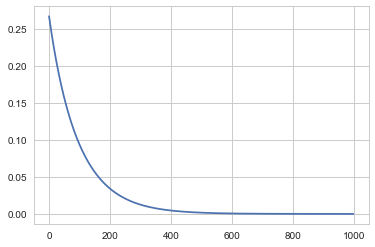

In [44]:
learning_rate = 0.001
costs = []
for i in range(1000):
    Yhat = X.dot(w)
    delta = Yhat - Y
    
    w = w - learning_rate * X.T.dot(delta)
    mse = delta.T.dot(delta) / N
    costs.append(mse)
    
plt.plot(costs)

In [45]:
w

array([ 0.49761065, -0.49425765,  0.49903628])

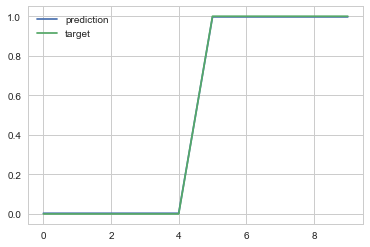

In [46]:
plt.plot(Yhat, label='prediction')
plt.plot(Y, label='target')
plt.legend()